# Customer Segmentation using K-Means & DBSCAN Clustering

![](https://ds055uzetaobb.cloudfront.net/brioche/uploads/y4KGN92h7r-screen-shot-2016-05-05-at-43007-pm.png?width=1200)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN

In [2]:
data = pd.read_csv('./data/Mall_Customers.csv')

data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
features = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
features

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [4]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

scaled_features

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590

![](https://miro.medium.com/0*aY163H0kOrBO46S-.png)

![](https://miro.medium.com/v2/resize:fit:1400/1*HLz-gxBqgNMm35SOzB7jag.png)

In [5]:
inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

In [6]:
inertia

[600.0,
 389.38618895643714,
 295.4562449213556,
 205.2251474767592,
 169.89149793438585,
 134.3527747740149,
 121.38935022502872,
 113.72723000071335,
 102.13623844329253,
 92.55027231838785]

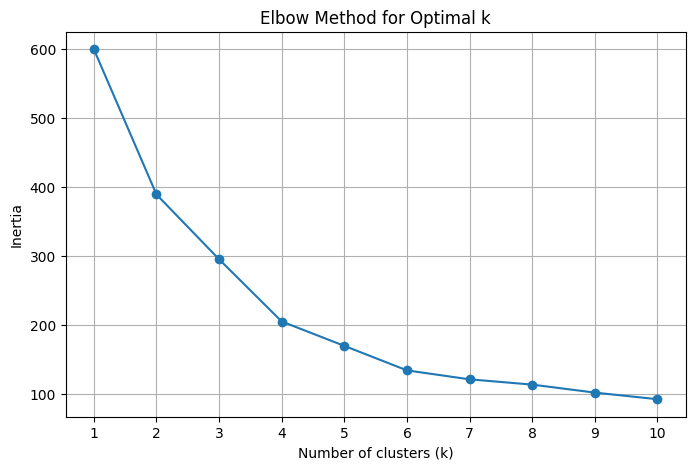

In [7]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid()
plt.show()

In [8]:
optimal_clusters = 4

# Perform K-Means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, init='k-means++', max_iter=300)
cluster_labels = kmeans.fit_predict(scaled_features)
cluster_labels

array([2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2,
       2, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0,
       0, 2, 3, 2, 2, 2, 0, 0, 0, 0, 2, 3, 1, 1, 3, 1, 3, 1, 0, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

In [9]:
data['cluster'] = cluster_labels
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,2
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,3
197,198,Male,32,126,74,1
198,199,Male,32,137,18,3


In [10]:
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)

cluster_centers

array([[53.98461538, 47.70769231, 39.96923077],
       [32.875     , 86.1       , 81.525     ],
       [25.43859649, 40.        , 60.29824561],
       [39.36842105, 86.5       , 19.57894737]])

In [11]:
cluster_profiles = pd.DataFrame(cluster_centers, columns=features.columns)

cluster_profiles

,Age,Annual Income (k$),Spending Score (1-100)
0,53.984615,47.707692,39.969231
1,32.875000,86.100000,81.525000
2,25.438596,40.000000,60.298246
3,39.368421,86.500000,19.578947


In [12]:
data['cluster'].value_counts()

cluster
0    65
2    57
1    40
3    38
Name: count, dtype: int64

## Performance Metrics


The silhouette_score is a metric used to evaluate the quality of clusters created by a clustering algorithm like KMeans. It measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The score ranges from -1 to 1, where:

* 1 indicates that the clusters are well-separated and the data points are appropriately clustered.
* 0 indicates that the data points are on or very close to the decision boundary between two neighboring clusters.
* -1 indicates that the data points might have been assigned to the wrong clusters.

![](https://miro.medium.com/1*N3Xm52bELqrju_DWLqjyHg.jpeg)

In [13]:
from sklearn.metrics import silhouette_score

silhouette_coefficients = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

In [14]:
silhouette_coefficients

[0.3354719289400457,
 0.3579234303882264,
 0.4039582785148566,
 0.40846873777345605,
 0.43106526216603014,
 0.410091114520974,
 0.36736631653222945,
 0.37442148555078425,
 0.36186970479722974]

## DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
![](https://media.geeksforgeeks.org/wp-content/uploads/20250912174514326431/4.webp)

In [15]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_features)
data['dbscan_cluster'] = dbscan_labels

data['dbscan_cluster'].value_counts()

dbscan_cluster
-1    60
 2    51
 4    32
 3    28
 0    17
 5     7
 1     5
Name: count, dtype: int64

In [16]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster,dbscan_cluster
0,1,Male,19,15,39,2,-1
1,2,Male,21,15,81,2,0
2,3,Female,20,16,6,2,-1
3,4,Female,23,16,77,2,0
4,5,Female,31,17,40,2,-1


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
 5   cluster                 200 non-null    int32 
 6   dbscan_cluster          200 non-null    int64 
dtypes: int32(1), int64(5), object(1)
memory usage: 10.3+ KB


In [21]:
# group data by dbscan_cluster and calculate mean of each feature
dbscan_cluster_profiles = data.groupby('dbscan_cluster').mean()
dbscan_cluster_profiles

TypeError: agg function failed [how->mean,dtype->object]